In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import datetime
from pandas import Series
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.corpus import names

In [3]:
 from nltk.stem.porter import PorterStemmer 

In [4]:
porter_stemmer = PorterStemmer()

In [5]:
porter_stemmer.stem('machines') 

'machin'

In [6]:
from nltk.stem import WordNetLemmatizer

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
lemmatizer.lemmatize('machines') 

'machine'

In [9]:
from sklearn.datasets import fetch_20newsgroups

In [10]:
 groups = fetch_20newsgroups()

In [17]:
 groups.keys() 

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [12]:
 groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [16]:
#Then what are the distinct values for these integers? We can use the unique function from NumPy to figure it out:
    
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [18]:
# So 20 different topics present Let’s now have a look at the first document, its topic number, and name: 

groups.data[0] 

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [19]:
 groups.target[0]

7

In [20]:
 groups.target_names[groups.target[0]]

'rec.autos'

In [21]:
 groups.target_names[groups.target[1]]

'comp.sys.mac.hardware'

In [22]:
groups.data[1]

"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n"

In [24]:
# Length of first data
len(groups.data[0]) 

721

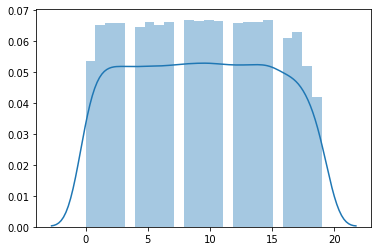

In [25]:
# Data Visualization

sns.distplot(groups.target)

In [26]:
plt.show()

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

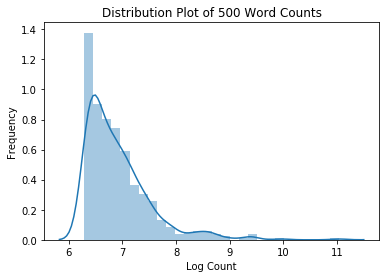

In [27]:
#The following code displays a histogram of the 500 highest word counts: 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.datasets import fetch_20newsgroups 
cv = CountVectorizer(stop_words="english", max_features=500) 
groups = fetch_20newsgroups() 
transformed = cv.fit_transform(groups.data) 
print(cv.get_feature_names()) 
sns.distplot(np.log(transformed.toarray().sum(axis=0))) 
plt.xlabel('Log Count') 
plt.ylabel('Frequency')
plt.title('Distribution Plot of 500 Word Counts') 
plt.show()

In [51]:
# This is our first trail of getting the list of top 500 words with the goal of the most indicative features. 
# It doesn’t look perfect. Can we improve it? Yes, by the data preprocessing techniques in the next section.

# maybe we should only allow items that consist only of letters. The posts contain names such as andrew as well. 
# We can filter names with the Names corpus from NLTK we just worked with. 
# Of course, with every filtering we apply, we have to make sure that we don't lose information. Finally Stemming and Lemmatization

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.datasets import fetch_20newsgroups 
from nltk.corpus import names 
from nltk.stem import WordNetLemmatizer 
def letters_only(astr): 
    return astr.isalpha() 
cv = CountVectorizer(stop_words="english", max_features=500) 
groups = fetch_20newsgroups() 
cleaned = [] 
all_names = set(names.words()) 
lemmatizer = WordNetLemmatizer()
for post in groups.data:
    for word in post.split():
        word = word.lower()
        if letters_only(word) and word not in all_names:
                cleaned.append(' '.join([lemmatizer.lemmatize(word)])) 
    
transformed=cv.fit_transform(cleaned) 
cv.get_feature_names()
 

['able',
 'accept',
 'access',
 'according',
 'act',
 'action',
 'actually',
 'add',
 'address',
 'ago',
 'agree',
 'algorithm',
 'allow',
 'american',
 'anonymous',
 'answer',
 'anybody',
 'apple',
 'application',
 'apr',
 'april',
 'arab',
 'area',
 'argument',
 'armenian',
 'article',
 'ask',
 'asked',
 'assume',
 'atheist',
 'attack',
 'attempt',
 'available',
 'away',
 'bad',
 'based',
 'belief',
 'believe',
 'best',
 'better',
 'bible',
 'big',
 'bike',
 'bit',
 'black',
 'board',
 'body',
 'book',
 'box',
 'build',
 'bus',
 'buy',
 'ca',
 'california',
 'called',
 'came',
 'canada',
 'car',
 'card',
 'care',
 'carry',
 'case',
 'cause',
 'center',
 'certain',
 'certainly',
 'chance',
 'change',
 'check',
 'child',
 'chip',
 'christian',
 'church',
 'city',
 'claim',
 'clear',
 'clinton',
 'clipper',
 'code',
 'college',
 'color',
 'come',
 'coming',
 'command',
 'comment',
 'common',
 'communication',
 'company',
 'computer',
 'consider',
 'considered',
 'contact',
 'control',
 

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20) 
km.fit(transformed) 
labels = groups.target 
plt.scatter(labels, km.labels(transformed)) 
plt.xlabel('Newsgroup') 
plt.ylabel('Cluster') 
plt.show() 

AttributeError: 'KMeans' object has no attribute 'labels'

In [ ]:
# One of the topic modeling algorithms is non-negative matrix factorization (NMF). 
# article about Python programming will have words such as class and function, 
# while a story about snakes will have words such as eggs and afraid.  
# Documents usually have multiple topics, for instance, this recipe is about topic models and non-negative matrix factorization
# We can, therefore, define an additive model for topics by assigning different weights to topics. 

from sklearn.decomposition import NMF 
all_names = set(names.words()) 
nmf = NMF(n_components=100, random_state=43).fit(transformed)
for topic_idx, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_idx)
    for i in topic.argsort()[:-9:-1]:
        print(label, " ".join([cv.get_feature_names()[i]])) 
